# 데이터 전처리 연습
- 결측값 확인 -> 처리 (삭제, 대체)
- 중복 데이터 제거
- 데이터 변환
- 이상값 처리

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 결측값 확인 및 처리
- pd.isnull (해당 데이터프레임에 결측값이 있는지)
- pd.dropna (결측값을 삭제)
- pd.fillna (na라는 결측값을 다른 값으로 채워넣음)

In [14]:
df = pd.DataFrame(np.random.randn(5,5), columns = ['V','W','X','Y','Z'])
df

,V,W,X,Y,Z
0,0.205526,-2.726696,-0.524753,-0.394560,0.912874
1,0.079544,0.551917,-0.717387,-0.048022,0.320539
2,-0.597835,1.490386,0.030268,-0.095002,0.130503
3,-0.122895,-1.100832,-0.148134,-0.637772,-0.365574
4,0.932439,0.038237,-0.011651,0.689543,-0.573577


In [15]:
# 결측치를 일부러 넣어주기

df_nan = df[df > -1]
df_nan

,V,W,X,Y,Z
0,0.205526,NaN,-0.524753,-0.394560,0.912874
1,0.079544,0.551917,-0.717387,-0.048022,0.320539
2,-0.597835,1.490386,0.030268,-0.095002,0.130503
3,-0.122895,NaN,-0.148134,-0.637772,-0.365574
4,0.932439,0.038237,-0.011651,0.689543,-0.573577


In [16]:
df_nan.isnull()  # True가 결측치

,V,W,X,Y,Z
0,False,True,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False


In [17]:
df_nan.dropna()  # 행 단위 기준 (axis=0)

,V,W,X,Y,Z
1,0.079544,0.551917,-0.717387,-0.048022,0.320539
2,-0.597835,1.490386,0.030268,-0.095002,0.130503
4,0.932439,0.038237,-0.011651,0.689543,-0.573577


In [18]:
df_nan.dropna(axis=1)  # 열 단위 기준

,V,X,Y,Z
0,0.205526,-0.524753,-0.394560,0.912874
1,0.079544,-0.717387,-0.048022,0.320539
2,-0.597835,0.030268,-0.095002,0.130503
3,-0.122895,-0.148134,-0.637772,-0.365574
4,0.932439,-0.011651,0.689543,-0.573577


In [19]:
df_nan.fillna(0)  # 0으로 결측치를 대체

,V,W,X,Y,Z
0,0.205526,0.000000,-0.524753,-0.394560,0.912874
1,0.079544,0.551917,-0.717387,-0.048022,0.320539
2,-0.597835,1.490386,0.030268,-0.095002,0.130503
3,-0.122895,0.000000,-0.148134,-0.637772,-0.365574
4,0.932439,0.038237,-0.011651,0.689543,-0.573577


In [20]:
df_nan.fillna(df_nan.mean())  # 평균값으로 결측치를 대체

,V,W,X,Y,Z
0,0.205526,0.693513,-0.524753,-0.394560,0.912874
1,0.079544,0.551917,-0.717387,-0.048022,0.320539
2,-0.597835,1.490386,0.030268,-0.095002,0.130503
3,-0.122895,0.693513,-0.148134,-0.637772,-0.365574
4,0.932439,0.038237,-0.011651,0.689543,-0.573577


## 2. 중복데이터 제거
- df.duplicated   (중복된 행 찾기)
- df.drop_duplicates  (중복된 행들 중 하나만 남기고 나머지 삭제)

In [21]:
data = {'A':[1,3,4,7,1], 'B':[2,3,5,10,2]}

df = pd.DataFrame(data)
df

,A,B
0,1,2
1,3,3
2,4,5
3,7,10
4,1,2


In [22]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [24]:
df.drop_duplicates(inplace=True)
df

,A,B
0,1,2
1,3,3
2,4,5
3,7,10


## 3. 데이터 변환
- 데이터 자료형을 적절한 형태로 변환
- 하나의 열이 여러 개의 정보를 가지고 있을 경우 열을 분리
- 특정 데이터의 편향도가 클 경우 데이터 분포를 정규분포로 변형

In [26]:
date = pd.date_range(start='2018-04-24', end='2018-04-27', periods=10)
date

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-24 08:00:00',
               '2018-04-24 16:00:00', '2018-04-25 00:00:00',
               '2018-04-25 08:00:00', '2018-04-25 16:00:00',
               '2018-04-26 00:00:00', '2018-04-26 08:00:00',
               '2018-04-26 16:00:00', '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [29]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.080861,0.675923,-0.010714,0.531696
1,1.625459,1.719840,-2.052129,0.367621
2,-0.406679,-1.406805,0.411329,-0.323384
3,0.960099,1.308414,-1.661095,0.287993
4,-0.516057,-1.415160,-0.310297,-1.288571
5,0.655326,0.196852,-1.526452,-0.351656
6,0.044806,-1.399662,-1.484542,1.995338
7,-0.546361,0.802057,0.194928,-0.510305
8,0.482755,0.051846,0.198912,0.142231
9,0.361915,1.207215,-1.286813,1.047905


In [31]:
df['date'] = date
df

,0,1,2,3,date
0,-0.080861,0.675923,-0.010714,0.531696,2018-04-24 00:00:00
1,1.625459,1.719840,-2.052129,0.367621,2018-04-24 08:00:00
2,-0.406679,-1.406805,0.411329,-0.323384,2018-04-24 16:00:00
3,0.960099,1.308414,-1.661095,0.287993,2018-04-25 00:00:00
4,-0.516057,-1.415160,-0.310297,-1.288571,2018-04-25 08:00:00
5,0.655326,0.196852,-1.526452,-0.351656,2018-04-25 16:00:00
6,0.044806,-1.399662,-1.484542,1.995338,2018-04-26 00:00:00
7,-0.546361,0.802057,0.194928,-0.510305,2018-04-26 08:00:00
8,0.482755,0.051846,0.198912,0.142231,2018-04-26 16:00:00
9,0.361915,1.207215,-1.286813,1.047905,2018-04-27 00:00:00


In [32]:
# 업무시간과 비업무시간을 구분해서 새로운 열을 만들어봅시다.

In [33]:
df['Workhour'] = False
df

,0,1,2,3,date,Workhour
0,-0.080861,0.675923,-0.010714,0.531696,2018-04-24 00:00:00,False
1,1.625459,1.719840,-2.052129,0.367621,2018-04-24 08:00:00,False
2,-0.406679,-1.406805,0.411329,-0.323384,2018-04-24 16:00:00,False
3,0.960099,1.308414,-1.661095,0.287993,2018-04-25 00:00:00,False
4,-0.516057,-1.415160,-0.310297,-1.288571,2018-04-25 08:00:00,False
5,0.655326,0.196852,-1.526452,-0.351656,2018-04-25 16:00:00,False
6,0.044806,-1.399662,-1.484542,1.995338,2018-04-26 00:00:00,False
7,-0.546361,0.802057,0.194928,-0.510305,2018-04-26 08:00:00,False
8,0.482755,0.051846,0.198912,0.142231,2018-04-26 16:00:00,False
9,0.361915,1.207215,-1.286813,1.047905,2018-04-27 00:00:00,False


In [34]:
for idx, row in df.iterrows():    # DataFrame의 한줄 한줄을 idx와 row 기준으로 불러온다.
    cond = (row['date'].hour >= 9) & (row['date'].hour < 18)
    df.loc[idx, 'Workhour'] = cond
    
df

,0,1,2,3,date,Workhour
0,-0.080861,0.675923,-0.010714,0.531696,2018-04-24 00:00:00,False
1,1.625459,1.719840,-2.052129,0.367621,2018-04-24 08:00:00,False
2,-0.406679,-1.406805,0.411329,-0.323384,2018-04-24 16:00:00,True
3,0.960099,1.308414,-1.661095,0.287993,2018-04-25 00:00:00,False
4,-0.516057,-1.415160,-0.310297,-1.288571,2018-04-25 08:00:00,False
5,0.655326,0.196852,-1.526452,-0.351656,2018-04-25 16:00:00,True
6,0.044806,-1.399662,-1.484542,1.995338,2018-04-26 00:00:00,False
7,-0.546361,0.802057,0.194928,-0.510305,2018-04-26 08:00:00,False
8,0.482755,0.051846,0.198912,0.142231,2018-04-26 16:00:00,True
9,0.361915,1.207215,-1.286813,1.047905,2018-04-27 00:00:00,False


## 4. 이상값 처리
- 특정 열의 데이터가 정상 분포를 벗어나는 경우, 이상 값으로 간주
- 극단적으로 크거나 작은 값은 제거

In [41]:
df = pd.DataFrame(np.random.rand(10,5), columns = ['A','B','C','D','E'])
df

,A,B,C,D,E
0,0.565504,0.461781,0.845120,0.884494,0.739521
1,0.180248,0.610719,0.398899,0.729957,0.480449
2,0.084439,0.614866,0.240599,0.692445,0.600640
3,0.946164,0.563478,0.898840,0.310301,0.423094
4,0.076669,0.518410,0.945602,0.239987,0.400873
5,0.472267,0.185154,0.846641,0.409039,0.547481
6,0.430655,0.088658,0.662949,0.126293,0.497749
7,0.735135,0.853992,0.508737,0.369985,0.702383
8,0.596172,0.524573,0.712541,0.159740,0.943325
9,0.335695,0.609337,0.894843,0.989944,0.024853


<AxesSubplot:>

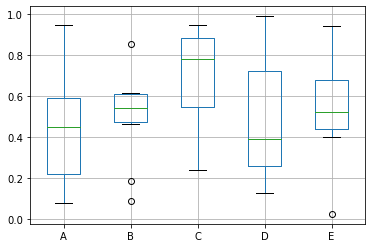

In [42]:
df.boxplot  # 점이 이상값

In [45]:
df[df['E'] > 0.3]

,A,B,C,D,E
0,0.565504,0.461781,0.845120,0.884494,0.739521
1,0.180248,0.610719,0.398899,0.729957,0.480449
2,0.084439,0.614866,0.240599,0.692445,0.600640
3,0.946164,0.563478,0.898840,0.310301,0.423094
4,0.076669,0.518410,0.945602,0.239987,0.400873
5,0.472267,0.185154,0.846641,0.409039,0.547481
6,0.430655,0.088658,0.662949,0.126293,0.497749
7,0.735135,0.853992,0.508737,0.369985,0.702383
8,0.596172,0.524573,0.712541,0.159740,0.943325


In [46]:
len(df[df['E'] > 0.3])    # 이상치 제외한 값들 9개

9